In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fft as fft
import asp_func as f

# Exercise 3 - LMS Variants

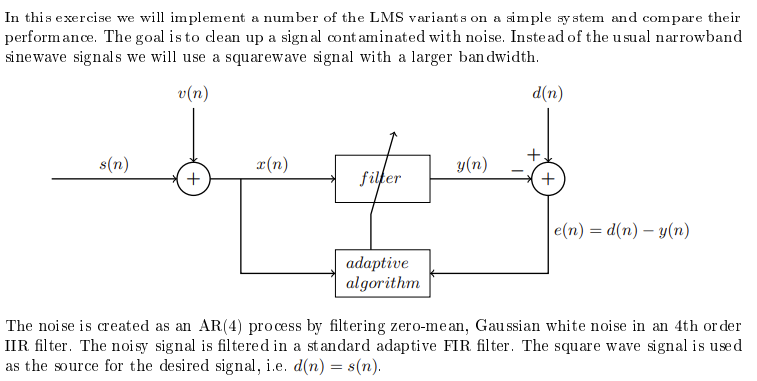

### 1)
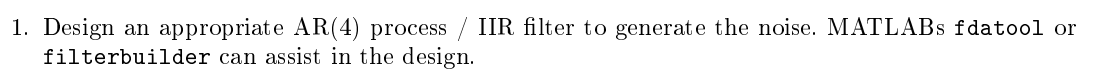

Somewhat arbitrary AR(4) process is designed as follows:

$$
x[n] = 0.2x[n-1] - 0.5x[n-2] + 0.3x[n-3] - 0.2[x-4] + e[n]
$$

$$
X(z) = 0.2X(z)z^{-1} + 0.5X(z)z^{-2} + 0.3X(z)z^{-3} - 0.2z^{4} + E(z)
$$

$$
X(z)[1 - 0.2z^{-1} - 0.5z^{-2} - 0.3z^{-3} + 0.2z^{-4}] = E(z)
$$

$$
H(z) = \frac{1}{1 - 0.2z^{-1} - 0.5z^{-2} - 0.3z^{-3} + 0.2z^{-4}}
$$

### 2)
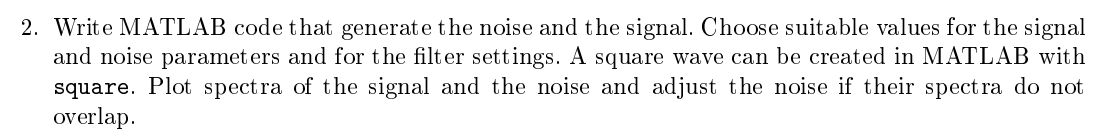

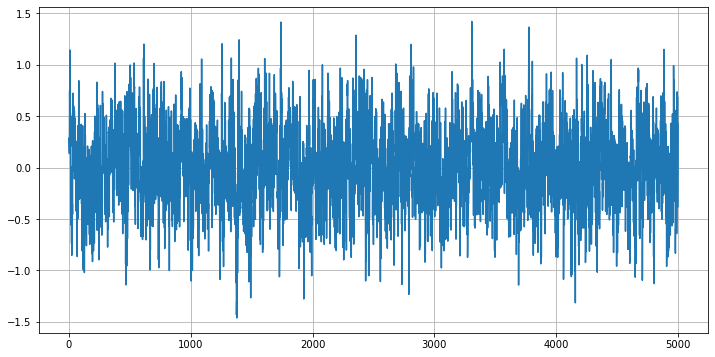

In [2]:
H_num = np.array([1])
H_den = np.array([1, -0.3, -0.2, -0.4, 0.2])

N = 5000 #Number of signal samples
variance = 0.1
WGN = np.random.normal(0,np.sqrt(variance),N)
vn = sig.lfilter(H_num, H_den, WGN)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(vn)
ax.grid()
plt.show()

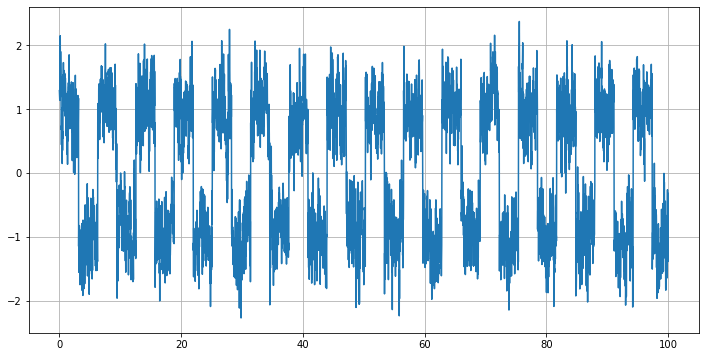

In [3]:
T = 100
lin = np.linspace(0,T,N)
dn = sig.square(lin, duty=0.5) #Square wave
xn = dn + vn #Square wave with additive WGN

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(lin, xn)
ax.grid()
plt.show()

In [4]:
np.log10(variance)

-1.0

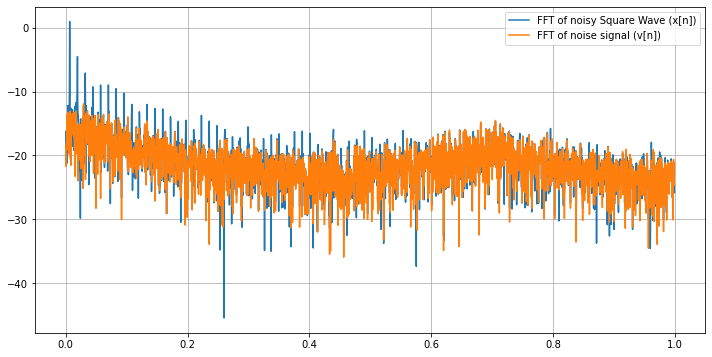

In [5]:
vn_fft = fft.fft(vn)
freqs = fft.fftfreq(N, 1/2)[:N//2]
vn_fft_db = 10*np.log10(2.0/N * abs(vn_fft[:N//2]))

xn_fft = fft.fft(xn)
xn_fft_db = 10*np.log10(2.0/N * abs(xn_fft[0:N//2]))

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(freqs, xn_fft_db, label="FFT of noisy Square Wave (x[n])")
ax.plot(freqs, vn_fft_db, label="FFT of noise signal (v[n])")
ax.legend()
ax.grid()
plt.show()

### 3)
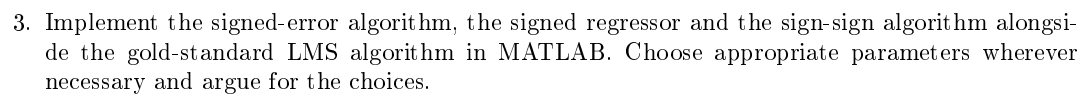

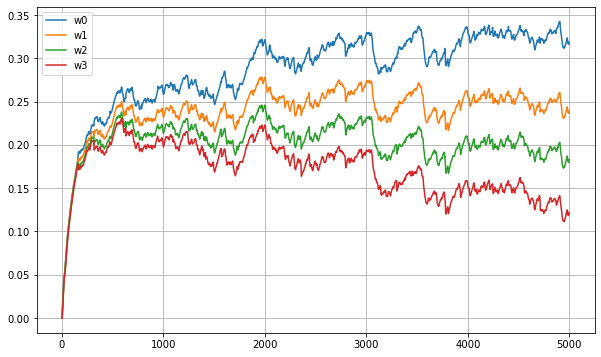

In [6]:
def LMS(x, d, order, step): #Takes data sequence (x), desired signal (d), number of filter taps (order), step-size (step)
    N = len(x)
    ws = np.zeros((N, order))
    ys = np.zeros(N)
    error = np.zeros(N)
    w = np.zeros(order)
    x_in = np.zeros(order)
    for k in range(N):
        ws[k] = w
        x_in = np.insert(x_in, 0, x[k])
        x_in = np.delete(x_in, -1)
        ys[k] = np.dot(w, x_in)
        error[k] = d[k] - ys[k]
        w = w + 2*step*error[k]*x_in
    return ws, ys, error

μ = 0.001

Ntaps = 4
ws, ys, err = LMS(xn, dn, Ntaps, μ)

fig, ax = plt.subplots(figsize=(10,6))
for w in range(Ntaps):
    ax.plot(ws[:,w], label=f"w{w}")
ax.legend()
ax.grid()
plt.show()

In [7]:
def sign_error_LMS(x, d, order, step):
    N = len(x)
    ws = np.zeros((N, order))
    ys = np.zeros(N)
    error = np.zeros(N)
    w = np.zeros(order)
    x_in = np.zeros(order)
    for k in range(N):
        ws[k] = w
        x_in = np.insert(x_in, 0, x[k])
        x_in = np.delete(x_in, -1)
        ys[k] = np.dot(w, x_in)
        error[k] = d[k] - ys[k]
        w = w + 2*step*np.sign(error[k])*x_in
    return ws, ys, error

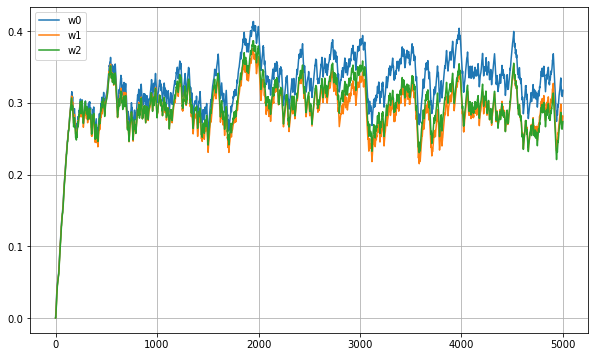

In [8]:
Ntaps = 3
ws_serr, ys_serr, err_serr = sign_error_LMS(xn, dn, Ntaps, μ)

fig, ax = plt.subplots(figsize=(10,6))
for w in range(Ntaps):
    ax.plot(ws_serr[:,w], label=f"w{w}")
ax.legend()
ax.grid()
plt.show()

In [9]:
def sign_regressor_LMS(x, d, order, step):
    N = len(x)
    ws = np.zeros((N, order))
    ys = np.zeros(N)
    error = np.zeros(N)
    w = np.zeros(order)
    x_in = np.zeros(order)
    for k in range(N):
        ws[k] = w
        x_in = np.insert(x_in, 0, x[k])
        x_in = np.delete(x_in, -1)
        ys[k] = np.dot(w, x_in)
        error[k] = d[k] - ys[k]
        w = w + 2*step*error[k]*np.sign(x_in)
    return ws, ys, error

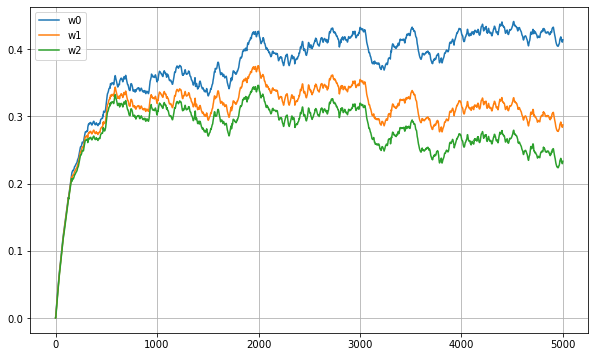

In [10]:
Ntaps = 3
ws_sreg, ys_sreg, err_sreg = sign_regressor_LMS(xn, dn, Ntaps, μ)

fig, ax = plt.subplots(figsize=(10,6))
for w in range(Ntaps):
    ax.plot(ws_sreg[:,w], label=f"w{w}")
ax.legend()
ax.grid()
plt.show()

In [11]:
def sign_sign_LMS(x, d, order, step):
    N = len(x)
    ws = np.zeros((N, order))
    ys = np.zeros(N)
    error = np.zeros(N)
    w = np.zeros(order)
    x_in = np.zeros(order)
    for k in range(N):
        ws[k] = w
        x_in = np.insert(x_in, 0, x[k])
        x_in = np.delete(x_in, -1)
        ys[k] = np.dot(w, x_in)
        error[k] = d[k] - ys[k]
        w = w + 2*step*np.sign(error[k])*np.sign(x_in)
    return ws, ys, error

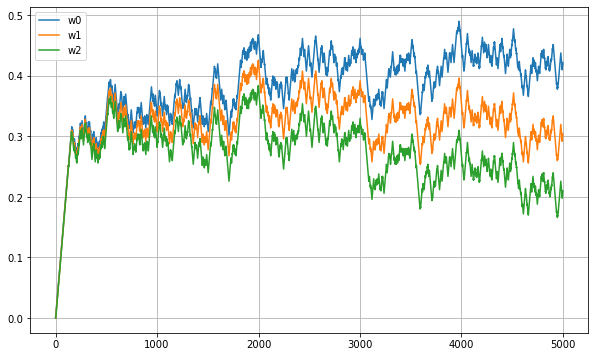

In [12]:
Ntaps = 3
ws_ss, ys_ss, err_ss = sign_sign_LMS(xn, dn, Ntaps, μ)

fig, ax = plt.subplots(figsize=(10,6))
for w in range(Ntaps):
    ax.plot(ws_ss[:,w], label=f"w{w}")
ax.legend()
ax.grid()
plt.show()